# Importing Libraries

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Dataset


In [12]:
iris = pd.read_csv("C:/Users/Administrator/Downloads/Iris-Data-Set-master/Iris-Data-Set-master/data/Iris.csv")

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [15]:
iris.drop('Id',axis=1,inplace=True)

In [16]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


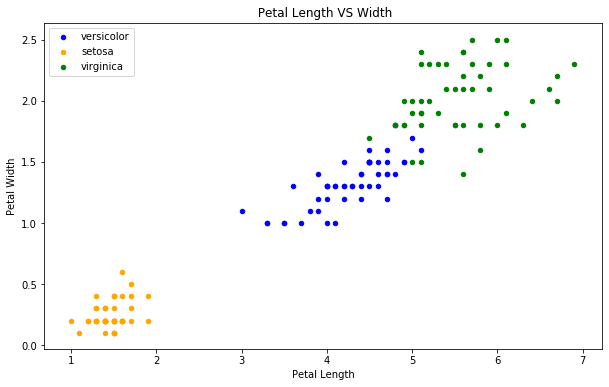

In [17]:
fig = iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor')
iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='setosa', ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')

fig.set_title(" Petal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(10,6)
fig.show()

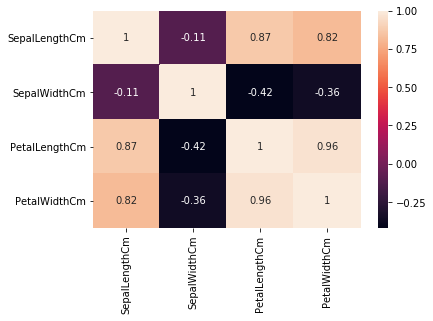

In [18]:
plt.figure()

sns.heatmap(iris.corr(), annot=True)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Spliting Data into Training and testing Dataset

In [28]:
train, test = train_test_split(iris, test_size=0.3)

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [29]:
train_X = train[['PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_X = test[['PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [30]:
train_X.head(2)

,PetalLengthCm,PetalWidthCm
36,1.3,0.2
135,6.1,2.3


In [31]:
test_X.head(2)

,PetalLengthCm,PetalWidthCm
64,3.6,1.3
66,4.5,1.5


# logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print("Accuracy Logistic Regression", metrics.accuracy_score(prediction,test_y))

Accuracy Logistic Regression 0.8444444444444444


c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Decision tree

In [34]:
model = DecisionTreeClassifier()

In [38]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)

print("Accuracy Decision Tree", metrics.accuracy_score(prediction,test_y))

Accuracy Decision Tree 0.9555555555555556


In [39]:
print(prediction)

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [40]:
#SVM

In [41]:
from sklearn import svm

In [42]:
clf = svm.SVC(gamma='scale')

In [43]:
clf.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
clf.predict([[2., 2.]])

array(['Iris-setosa'], dtype=object)